In [46]:
import serial
import time

serial_port = '/dev/cu.usbmodem11101'
ser = serial.Serial(serial_port, 38400)
value = []

check = input()
start_time = time.time()

while(1):
  
  if ser.readable():
    tem = ser.readline()
    val = tem.decode()
    l = list(val.split(','))
    l[-1] = l[-1].rstrip()
    l.append(float(time.time() - start_time))
    print(l)
    value.append(l)

['0.28', '-127.24', 0.00021696090698242188]
['-22.84', '61.84', '-126.43', 0.000476837158203125]
['-22.24', '61.90', '-126.29', 0.0005509853363037109]
['-21.62', '62.90', '-126.55', 0.0006289482116699219]
['-22.12', '63.18', '-128.05', 0.0006999969482421875]
['-21.75', '62.50', '-127.38', 0.0007729530334472656]
['-19.16', '65.93', '-127.83', 0.0008561611175537109]
['-19.90', '66.70', '-127.25', 0.0009229183197021484]
['-20.84', '64.84', '-126.72', 0.0010020732879638672]
['-20.50', '66.85', '-126.47', 0.001068115234375]
['-18.46', '67.69', '-126.83', 0.001132965087890625]
['-20.38', '63.97', '-127.91', 0.0012049674987792969]
['-19.51', '65.82', '-127.58', 0.0012848377227783203]
['-17.97', '66.65', '-128.74', 0.0013518333435058594]
['-19.77', '66.06', '-128.55', 0.0014238357543945312]
['-18.99', '67.61', '-125.88', 0.0014920234680175781]
['-19.06', '68.50', '-127.85', 0.0015628337860107422]
['-17.66', '66.16', '-129.87', 0.0016298294067382812]
['-25.28', '60.26', '-125.56', 0.00170278549

KeyboardInterrupt: 

In [47]:
import pandas as pd

df = pd.DataFrame(value, columns=["Roll", "Pitch", "Yaw", "Time"])
df = df.dropna()
df = df.astype(float)
df['Time'] = df['Time'].apply(lambda x: round(x, 4))

file_name = input()
df.to_csv("../data/" + file_name + ".csv", encoding='utf-8', index=False)

----------------------------------------------------------------------------------------------------

In [48]:
df

,Roll,Pitch,Yaw,Time
1,-22.84,61.84,-126.43,0.0005
2,-22.24,61.90,-126.29,0.0006
3,-21.62,62.90,-126.55,0.0006
4,-22.12,63.18,-128.05,0.0007
5,-21.75,62.50,-127.38,0.0008
...,...,...,...,...
405,16.29,56.02,-163.77,19.6589
406,-18.34,58.10,-137.33,19.7318
407,-19.03,69.85,-132.18,19.8016
408,-13.87,76.13,-133.97,19.8712


In [33]:
import pandas as pd
df1 = pd.read_csv('../data/230118_oj_rpy.csv')
df2 = pd.read_csv('../data/230118_mj_slow_walk.csv')

In [49]:
import matplotlib.pyplot as plt

def draw_plot(df, name):
    x = df['Time']
    
    f, axes = plt.subplots(3,1)
    # 격자 크기 설정
    f.set_size_inches((10, 10))
    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

    plt.title(name + "'s Gait")

    axes[0].plot(x, df['Roll'])
    axes[0].set_title('Roll')
    
    axes[1].plot(x, df['Pitch'])
    axes[1].set_title('Pitch')

    axes[2].plot(x, df['Yaw'])
    axes[2].set_title('Yaw')

    plt.show()

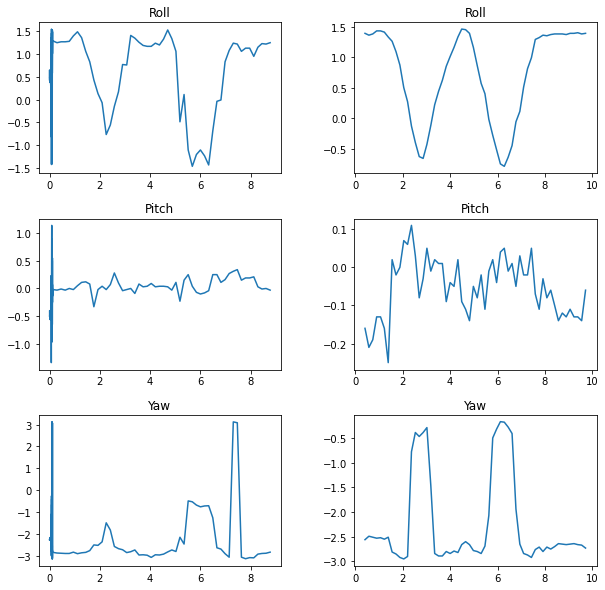

In [18]:


fast_x = df['Time']
slow_x = df1['Time']

f, axes = plt.subplots(3,2)
# 격자 크기 설정
f.set_size_inches((10, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

plt.title("Fast Walk vs Slow Walk")

axes[0, 0].plot(fast_x, df['Roll'])
axes[0, 0].set_title('Roll')

axes[1, 0].plot(fast_x, df['Pitch'])
axes[1, 0].set_title('Pitch')

axes[2, 0].plot(fast_x, df['Yaw'])
axes[2, 0].set_title('Yaw')



axes[0, 1].plot(slow_x, df1['Roll'])
axes[0, 1].set_title('Roll')

axes[1, 1].plot(slow_x, df1['Pitch'])
axes[1, 1].set_title('Pitch')

axes[2, 1].plot(slow_x, df1['Yaw'])
axes[2, 1].set_title('Yaw')


plt.show()

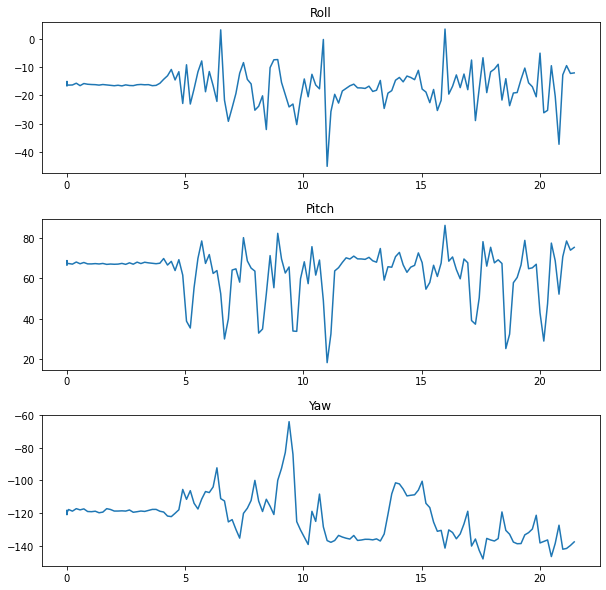

In [34]:
draw_plot(df1, "z")

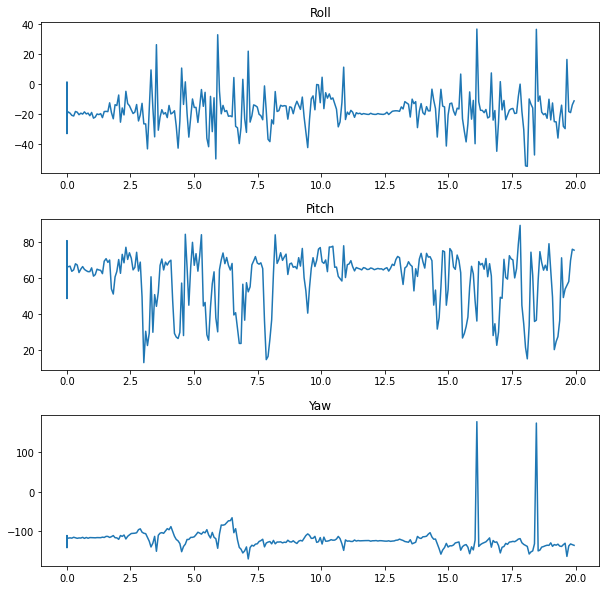

In [50]:
draw_plot(df, "z")

In [53]:
from scipy.stats import norm

df2 = df[df.columns.difference(['Time'])]
df2 = df2.apply(lambda x: norm.pdf(x))
df2['Time'] = df['Time']

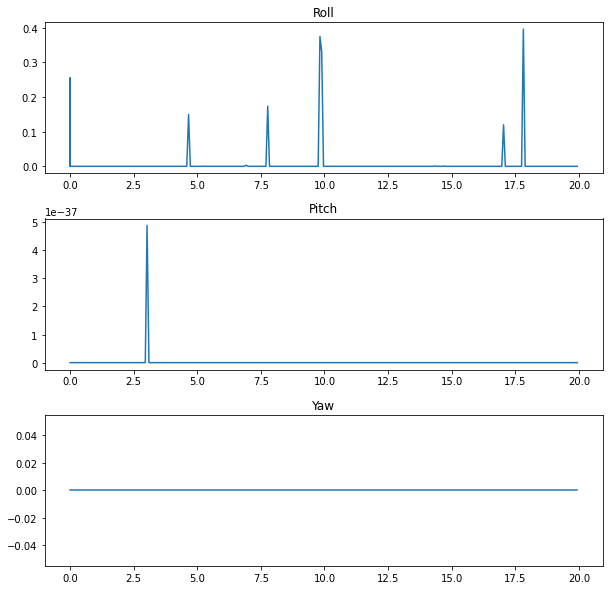

In [54]:
draw_plot(df2, "df2")